In [6]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [8]:
filename = '/Users/wangjiabin/ML_2020_summer/<ml with python practice>/chap_11_metric_for _algorithm_evaluation/housing.csv'
#'/Users/wangjiabin/ML_2020_summer/<ml with python practice>/cha_7_data_visibility/pima_data.csv'
names =['PRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','RATATIO','B','LATAT','MEDV']
data = read_csv(filename,delim_whitespace =True,names =names)#
#print(data)
print(data.shape)
print(data.dtypes)

(506, 14)
PRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
RATATIO    float64
B          float64
LATAT      float64
MEDV       float64
dtype: object


In [12]:
#set_option('display.line_width',120)
print(data.head(10))

      PRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   RATATIO       B  LATAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

In [15]:
set_option('precision',2)
print(data.corr(method='pearson'))
print(data.describe())

         PRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
PRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
RATATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

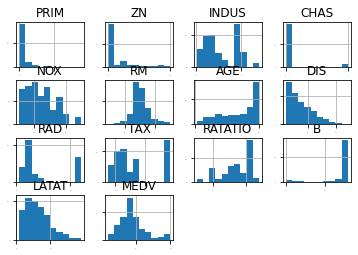

In [18]:
data.hist(sharex =False, sharey = False, xlabelsize =1, ylabelsize = 1)
pyplot.show()

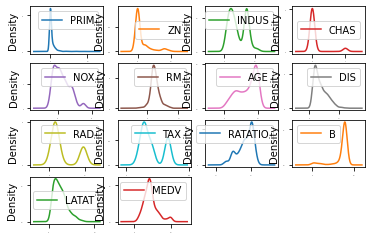

In [21]:
data.plot(kind = 'density', subplots = True, layout = (4,4,), sharex =False, fontsize =1)
pyplot.show()

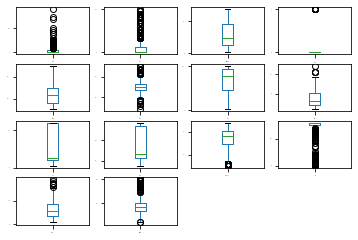

In [22]:
data.plot(kind = 'box', subplots = True, layout = (4,4,), sharex =False, fontsize =1)
pyplot.show()

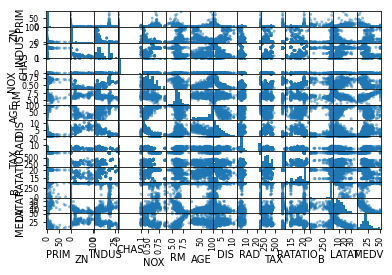

In [27]:
scatter_matrix(data)
pyplot.show()

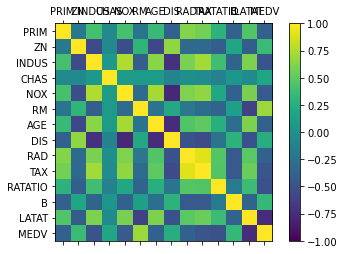

In [30]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin =-1, vmax =1, interpolation ='none')
fig.colorbar(cax)
ticks = np.arange(0, 14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [32]:
array = data.values
x = array[:,0:13]
y = array[:,13]
validation_size = 0.2
seed = 7
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = validation_size, random_state = seed)

In [33]:
num_folds =10
seed =7
scoring = 'neg_mean_squared_error'

In [38]:
models = {}
models['LR'] = LinearRegression()
models['Lasso'] = Lasso()
models['EN'] = ElasticNet()
models['KNN'] = KNeighborsRegressor()#kNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['svm'] = SVR()

In [44]:
results = []
for key in models:
    kfold =KFold(n_splits = num_folds,shuffle = True, random_state = seed)
    cv_result = cross_val_score(models[key], x_train, y_train, cv= kfold, scoring = scoring)
    results.append(cv_result)
    print('%s:%f(%f)'% (key, cv_result.mean(), cv_result.std()))

LR:-22.006009(12.188886)
Lasso:-27.105803(13.165915)
EN:-27.923014(13.156405)
KNN:-39.808936(16.507968)
CART:-25.181111(16.227293)
svm:-67.824705(32.801530)


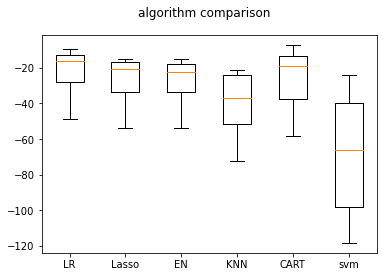

In [49]:
fig = pyplot.figure()
fig.suptitle('algorithm comparison')
ax =fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()